Quick look at one of the datasets, and simple ARIMA model

In [13]:
from numpy import split
from numpy import array
import numpy as np
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import pandas as pd

In [14]:
pd.set_option('display.max_columns', None)

In [17]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

mac = pd.read_csv('{0}LCLid/mac000041.csv'.format(PATH), parse_dates=['day_time'], date_parser=dateparse)

In [18]:
mac.head()

,LCLid,energy(kWh/hh),dayYear,dayMonth,dayWeek,dayDay,dayDayofweek,dayDayofyear,dayIs_month_end,dayIs_month_start,dayIs_quarter_end,dayIs_quarter_start,dayIs_year_end,dayIs_year_start,dayElapsed,delta_minutes,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,precipType,humidity,summary,day_time,is_bank_holiday,Bank_holiday_Boxing_Day,Bank_holiday_Christmas_Day,Bank_holiday_Early_May_bank_holiday,Bank_holiday_Easter_Monday,Bank_holiday_Good_Friday,Bank_holiday_New_Years_Day,Bank_holiday_New_Years_Day_substitute_day,Bank_holiday_Queens_Diamond_Jubilee_extra_bank_holiday,Bank_holiday_Spring_bank_holiday,Bank_holiday_Spring_bank_holiday_substitute_day,Bank_holiday_Summer_bank_holiday,energy_csum
0,MAC000041,0.059,2012,10,41,12,4,286,False,False,False,False,False,False,1350000000,0,11.76,234.0,13.610,12.21,999.470,13.610,5.400,rain,0.910,Mostly Cloudy,2012-10-12 00:00:00,False,0,0,0,0,0,0,0,0,0,0,0,2214.590
1,MAC000041,0.059,2012,10,41,12,4,286,False,False,False,False,False,False,1350000000,30,12.63,242.0,13.350,11.79,999.785,13.350,6.085,rain,0.900,Mostly Cloudy,2012-10-12 00:30:00,False,0,0,0,0,0,0,0,0,0,0,0,2214.649
2,MAC000041,0.058,2012,10,41,12,4,286,False,False,False,False,False,False,1350000000,60,13.50,250.0,13.090,11.37,1000.100,13.090,6.770,rain,0.890,Breezy and Mostly Cloudy,2012-10-12 01:00:00,False,0,0,0,0,0,0,0,0,0,0,0,2214.707
3,MAC000041,0.059,2012,10,41,12,4,286,False,False,False,False,False,False,1350000000,90,13.50,251.0,12.815,10.82,1000.305,12.815,6.615,rain,0.875,Breezy and Mostly Cloudy,2012-10-12 01:30:00,False,0,0,0,0,0,0,0,0,0,0,0,2214.766
4,MAC000041,0.059,2012,10,41,12,4,286,False,False,False,False,False,False,1350000000,120,13.50,252.0,12.540,10.27,1000.510,12.540,6.460,rain,0.860,Mostly Cloudy,2012-10-12 02:00:00,False,0,0,0,0,0,0,0,0,0,0,0,2214.825


In [19]:
mac.sort_values(by=['day_time'], inplace=True)

In [26]:
#find the first valid value
mac['energy(kWh/hh)'].first_valid_index()

Timestamp('2011-12-08 10:30:00')

In [27]:
#find the last valid value
mac['energy(kWh/hh)'].last_valid_index()

Timestamp('2014-02-28 00:00:00')

In [28]:
ref_date_range = pd.date_range('2011-12-8 00:00:00', '2014-2-28 23:30:00', freq='30Min')

In [29]:
ref_df = pd.DataFrame(np.random.randint(1, 20, (ref_date_range.shape[0], 1)))
ref_df.index = ref_date_range  # set index

In [31]:
#check for missing datetimeindex values based on reference index (with all values) 
missing_dates = ref_df.index[~ref_df.index.isin(mac.index)]

print('frac missing: {0}'.format(len(missing_dates)/len(mac)))

frac missing: 0.00010238558410975735


In [32]:
len(missing_dates), len(mac), missing_dates

(4, 39068, DatetimeIndex(['2013-09-09 23:00:00', '2013-09-09 23:30:00',
                '2013-09-10 00:00:00', '2013-09-10 00:30:00'],
               dtype='datetime64[ns]', freq='30T'))

In [33]:
prev_row = mac.loc['2013-09-09 22:30:00']
post_row = mac.loc['2013-09-10 01:00:00']

As a quick hack we are just going to duplicate the prev row 2x and post row 2x to fill in the gaps

In [34]:
# DatetimeIndex.insert(loc, item)[source]
mac.loc[pd.to_datetime('2013-09-09 23:00:00')] = prev_row
mac.loc[pd.to_datetime('2013-09-09 23:30:00')] = prev_row
mac.loc[pd.to_datetime('2013-09-10 00:00:00')] = post_row
mac.loc[pd.to_datetime('2013-09-10 00:30:00')] = post_row

In [35]:
mac = mac.sort_index()

In [36]:
#double check missing dates were fixed
missing_dates = ref_df.index[~ref_df.index.isin(mac.index)]

print('frac missing: {0}, total: {1}, total days: {2}'.format(len(missing_dates)/len(mac), len(mac), len(mac)/48))

frac missing: 0.0, total: 39072, total days: 814.0


In [37]:
#check if more than necessary in data
inv_missing_dates = mac.index[~mac.index.isin(ref_df.index)]
print('frac missing: {0}, inv_missing_dates: {1}'.format(len(inv_missing_dates)/len(mac), inv_missing_dates))

frac missing: 0.0, inv_missing_dates: DatetimeIndex([], dtype='datetime64[ns]', name='day_time', freq=None)


In [38]:
len(ref_df), len(ref_df)/48, len(mac), len(mac)/48

(39072, 814.0, 39072, 814.0)

In [39]:
mac.fillna(0, inplace=True)

Plot a sample households daily power use

In [41]:
#mac.set_index(['day_time'],inplace=True)

In [42]:
#convert to time series:
ts = mac['energy(kWh/hh)']

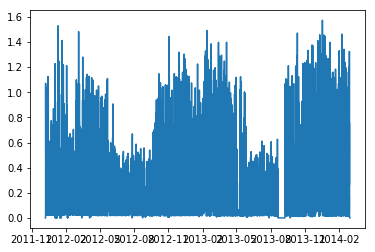

In [43]:
plt.plot(ts)

In [44]:
## Test stationarity

In [45]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

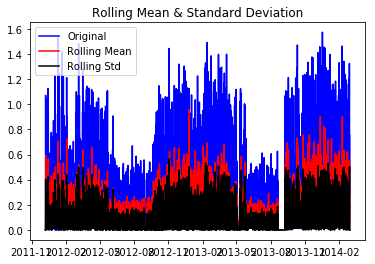

Results of Dickey-Fuller Test:
Test Statistic                -1.113694e+01
p-value                        3.177987e-20
#Lags Used                     5.200000e+01
Number of Observations Used    3.901900e+04
Critical Value (5%)           -2.861614e+00
Critical Value (1%)           -3.430518e+00
Critical Value (10%)          -2.566809e+00
dtype: float64


In [46]:
test_stationarity(ts)

/home/walle/.virtualenvs/datascience/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


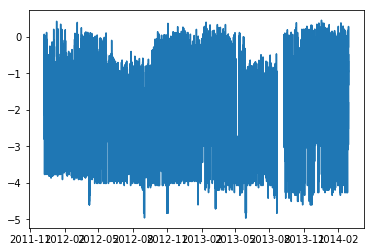

In [47]:
ts_log = np.log(ts)
plt.plot(ts_log)

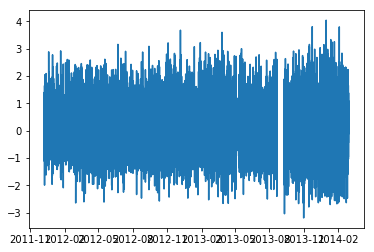

In [48]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [49]:
from statsmodels.tsa.arima_model import ARIMA

In [50]:
ts_log_diff = ts_log_diff.fillna(0)
ts_log = ts_log.fillna(0)

In [51]:
ts_log[ts_log < 0] = 0

/home/walle/.virtualenvs/datascience/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/home/walle/.virtualenvs/datascience/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/home/walle/.virtualenvs/datascience/lib/python3.5/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/walle/.virtualenvs/datascience/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: Fu

Text(0.5,1,'RSS: nan')

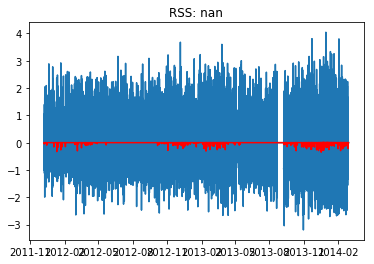

In [52]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

/home/walle/.virtualenvs/datascience/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


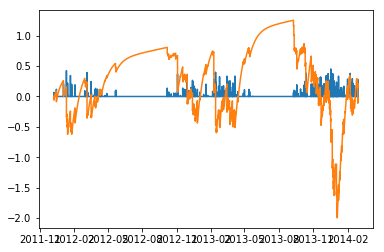

In [53]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

doesnt look correct, prediction seems to be inversely correlated, TODO, check this

Text(0.5,1,'RMSE: 1.6603')

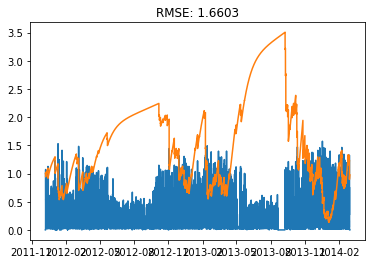

In [54]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))